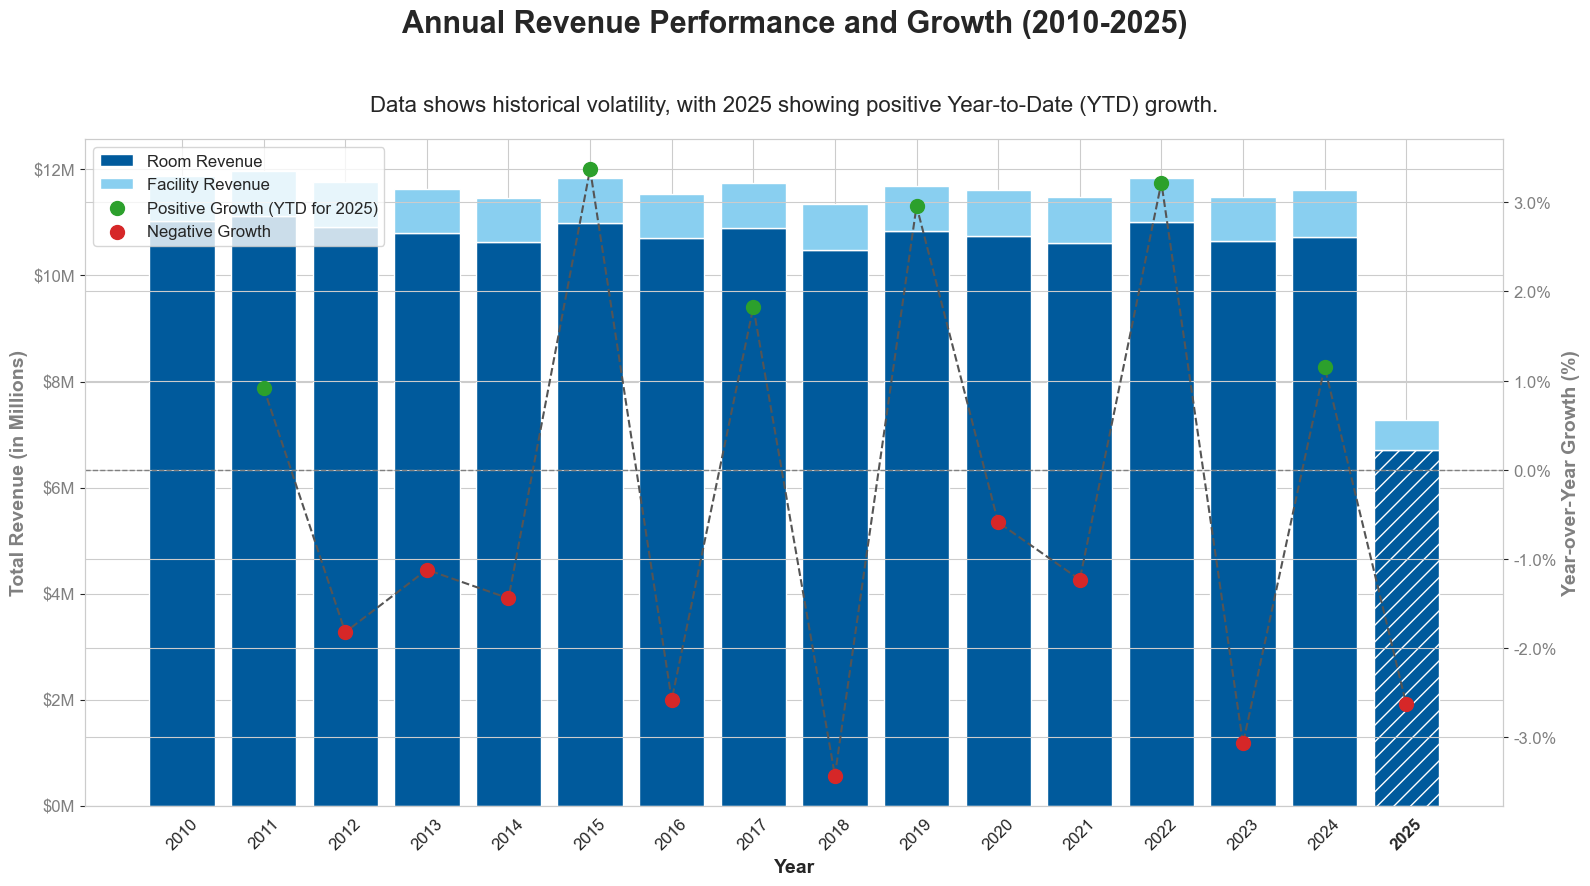

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Data Preparation (UPDATED with new data and YTD logic) ---
# Raw data from the SQL output
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Grand Total Revenue': [11867581, 11976606, 11758449, 11626641, 11459018, 11845226, 11539623, 11750156, 11347186, 11682720, 11613819, 11470686, 11839982, 11476556, 11608944, 7277599],
    'Total Room Revenue': [11020239, 11124037, 10912141, 10794813, 10635344, 10982163, 10710427, 10893531, 10485322, 10836631, 10750624, 10606805, 11002593, 10645552, 10732788, 6707724],
    'Total Facility Revenue': [847341, 852570, 846308, 831828, 823673, 863063, 829196, 856625, 861864, 846088, 863195, 863882, 837389, 831004, 876155, 569875]
}
df = pd.DataFrame(data)

# Calculate YoY Growth for full years
df['YoY Growth %'] = df['Grand Total Revenue'].pct_change() * 100

# *** CORRECTLY HANDLE 2025 YTD DATA ***
# Use the Q1-Q3 2024 data from Report 2 as a proxy for Jan-Aug 2024
revenue_2024_ytd = 2403234 + 2474032 + 2596757
revenue_2025_ytd = df.loc[df['Year'] == 2025, 'Grand Total Revenue'].iloc[0]
yoy_2025_ytd = ((revenue_2025_ytd / revenue_2024_ytd) - 1) * 100
df.loc[df['Year'] == 2025, 'YoY Growth %'] = yoy_2025_ytd

# --- 2. Visualization ---
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(16, 9))

# Plot bars, adding a different look for the YTD bar
bars = ax1.bar(df['Year'], df['Total Room Revenue'] / 1_000_000, color='#005A9C', label='Room Revenue')
ax1.bar(df['Year'], df['Total Facility Revenue'] / 1_000_000, bottom=df['Total Room Revenue'] / 1_000_000, color='#89CFF0', label='Facility Revenue')
bars[-1].set_hatch('//') # Add hatch to the last bar (2025 YTD) to distinguish it

ax1.set_ylabel('Total Revenue (in Millions)', fontsize=14, fontweight='bold', color='gray')
ax1.tick_params(axis='y', labelcolor='gray', labelsize=12)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}M'))
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_xticks(df['Year'])
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.get_xticklabels()[-1].set_fontweight('bold') # Bold the 2025 YTD label

ax2 = ax1.twinx()
positive_growth = df[df['YoY Growth %'] >= 0]
negative_growth = df[df['YoY Growth %'] < 0]
ax2.plot(df['Year'], df['YoY Growth %'], color='#555555', linestyle='--', marker='', zorder=1)
ax2.scatter(positive_growth['Year'], positive_growth['YoY Growth %'], color='#2ca02c', s=100, label='Positive Growth (YTD for 2025)', zorder=2)
ax2.scatter(negative_growth['Year'], negative_growth['YoY Growth %'], color='#d62728', s=100, label='Negative Growth', zorder=2)
ax2.axhline(0, color='grey', linestyle='--', linewidth=1)

ax2.set_ylabel('Year-over-Year Growth (%)', fontsize=14, fontweight='bold', color='gray')
ax2.tick_params(axis='y', labelcolor='gray', labelsize=12)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}%'))

# --- 3. Final Touches ---
fig.suptitle('Annual Revenue Performance and Growth (2010-2025)', fontsize=22, fontweight='bold')
plt.title('Data shows historical volatility, with 2025 showing positive Year-to-Date (YTD) growth.', fontsize=16, pad=20)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\wbrya\AppData\Local\Temp\ipykernel_5228\410492314.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = heatmap_data.applymap(lambda x: f'{x:+.1f}%' if pd.notna(x) else 'N/A')


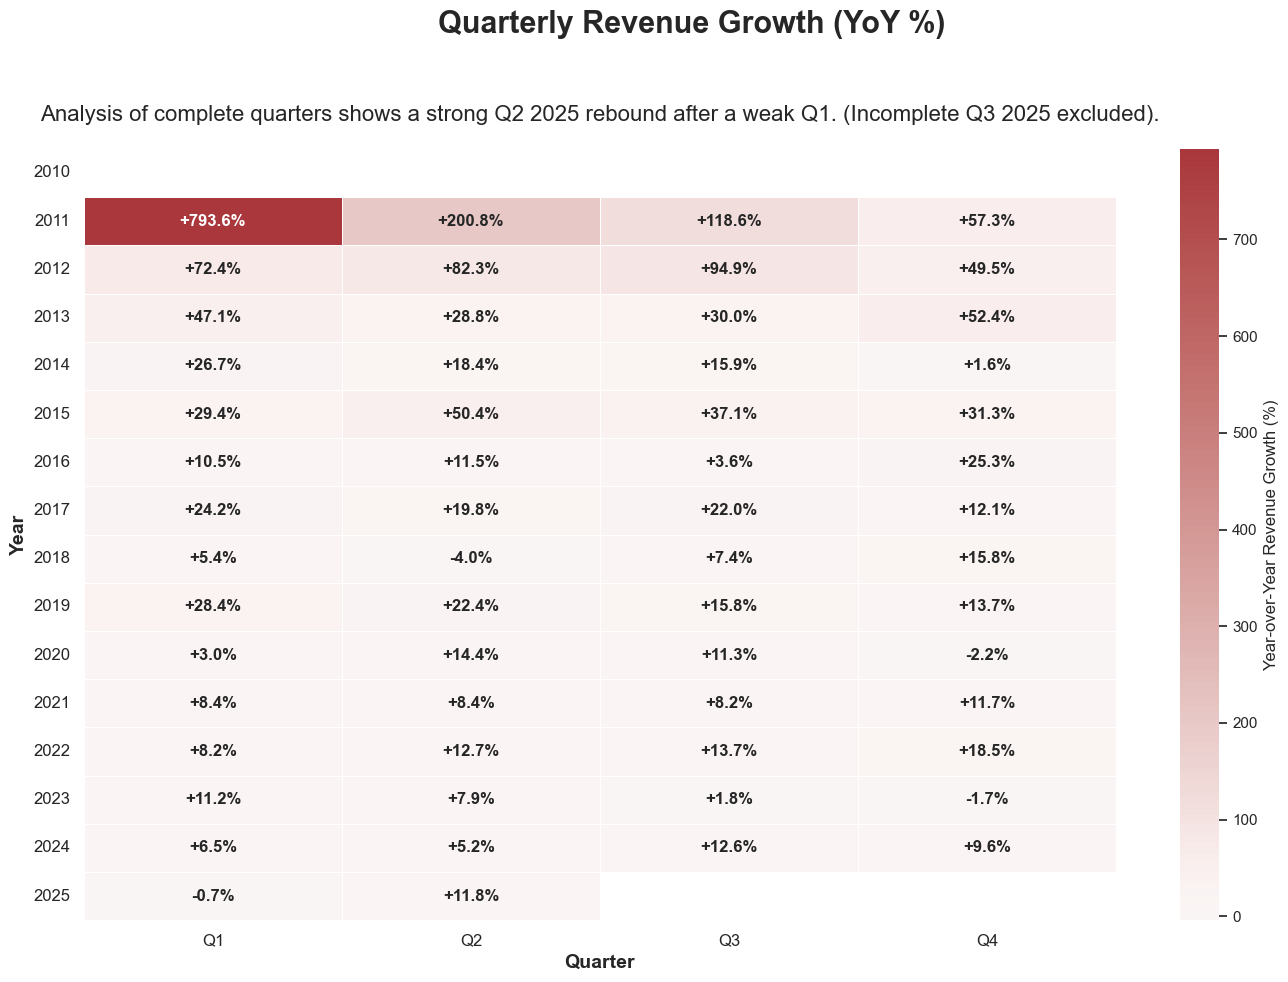

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Preparation (UPDATED with new data) ---
data = [
    [2010, 'Q1', 24310, None], [2010, 'Q2', 78971, None], [2010, 'Q3', 119630, None], [2010, 'Q4', 202043, None],
    [2011, 'Q1', 217244, 793.6], [2011, 'Q2', 237530, 200.8], [2011, 'Q3', 261538, 118.6], [2011, 'Q4', 317828, 57.3],
    [2012, 'Q1', 374603, 72.4], [2012, 'Q2', 432982, 82.3], [2012, 'Q3', 509715, 94.9], [2012, 'Q4', 475152, 49.5],
    [2013, 'Q1', 551167, 47.1], [2013, 'Q2', 557521, 28.8], [2013, 'Q3', 662862, 30.0], [2013, 'Q4', 724219, 52.4],
    [2014, 'Q1', 698515, 26.7], [2014, 'Q2', 660149, 18.4], [2014, 'Q3', 768070, 15.9], [2014, 'Q4', 735805, 1.6],
    [2015, 'Q1', 903776, 29.4], [2015, 'Q2', 992744, 50.4], [2015, 'Q3', 1053076, 37.1], [2015, 'Q4', 966311, 31.3],
    [2016, 'Q1', 998826, 10.5], [2016, 'Q2', 1107366, 11.5], [2016, 'Q3', 1091494, 3.6], [2016, 'Q4', 1210692, 25.3],
    [2017, 'Q1', 1240931, 24.2], [2017, 'Q2', 1326931, 19.8], [2017, 'Q3', 1331162, 22.0], [2017, 'Q4', 1357770, 12.1],
    [2018, 'Q1', 1308243, 5.4], [2018, 'Q2', 1274486, -4.0], [2018, 'Q3', 1429700, 7.4], [2018, 'Q4', 1571651, 15.8],
    [2019, 'Q1', 1679758, 28.4], [2019, 'Q2', 1559751, 22.4], [2019, 'Q3', 1655773, 15.8], [2019, 'Q4', 1787537, 13.7],
    [2020, 'Q1', 1730238, 3.0], [2020, 'Q2', 1784265, 14.4], [2020, 'Q3', 1842140, 11.3], [2020, 'Q4', 1748620, -2.2],
    [2021, 'Q1', 1876090, 8.4], [2021, 'Q2', 1934630, 8.4], [2021, 'Q3', 1993658, 8.2], [2021, 'Q4', 1954039, 11.7],
    [2022, 'Q1', 2029086, 8.2], [2022, 'Q2', 2179823, 12.7], [2022, 'Q3', 2266840, 13.7], [2022, 'Q4', 2316187, 18.5],
    [2023, 'Q1', 2256364, 11.2], [2023, 'Q2', 2351067, 7.9], [2023, 'Q3', 2306965, 1.8], [2023, 'Q4', 2277158, -1.7],
    [2024, 'Q1', 2403234, 6.5], [2024, 'Q2', 2474032, 5.2], [2024, 'Q3', 2596757, 12.6], [2024, 'Q4', 2496702, 9.6],
    [2025, 'Q1', 2385387, -0.7], [2025, 'Q2', 2765753, 11.8], [2025, 'Q3', 1391409, -46.4]
]
columns = ['Year', 'Qtr', 'Room_Revenue', 'Rev_YoY_Pct']
df = pd.DataFrame(data, columns=columns)

# *** CORRECTLY HANDLE 2025 PARTIAL DATA ***
# Exclude the incomplete Q3 2025 data from the visualization for an accurate heatmap
df_filtered = df[~((df['Year'] == 2025) & (df['Qtr'] == 'Q3'))]

# --- 2. Visualization ---
heatmap_data = df_filtered.pivot(index='Year', columns='Qtr', values='Rev_YoY_Pct')
annot_data = heatmap_data.applymap(lambda x: f'{x:+.1f}%' if pd.notna(x) else 'N/A')

sns.set_theme(style="white")
plt.figure(figsize=(14, 10))

ax = sns.heatmap(
    heatmap_data, annot=annot_data, fmt='s', cmap='vlag', center=0,
    linewidths=.5, cbar_kws={'label': 'Year-over-Year Revenue Growth (%)'},
    annot_kws={"size": 12, "weight": "bold"}
)

# --- 3. Final Touches ---
ax.figure.suptitle('Quarterly Revenue Growth (YoY %)', fontsize=22, fontweight='bold')
ax.set_title('Analysis of complete quarters shows a strong Q2 2025 rebound after a weak Q1. (Incomplete Q3 2025 excluded).', fontsize=16, pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Year', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

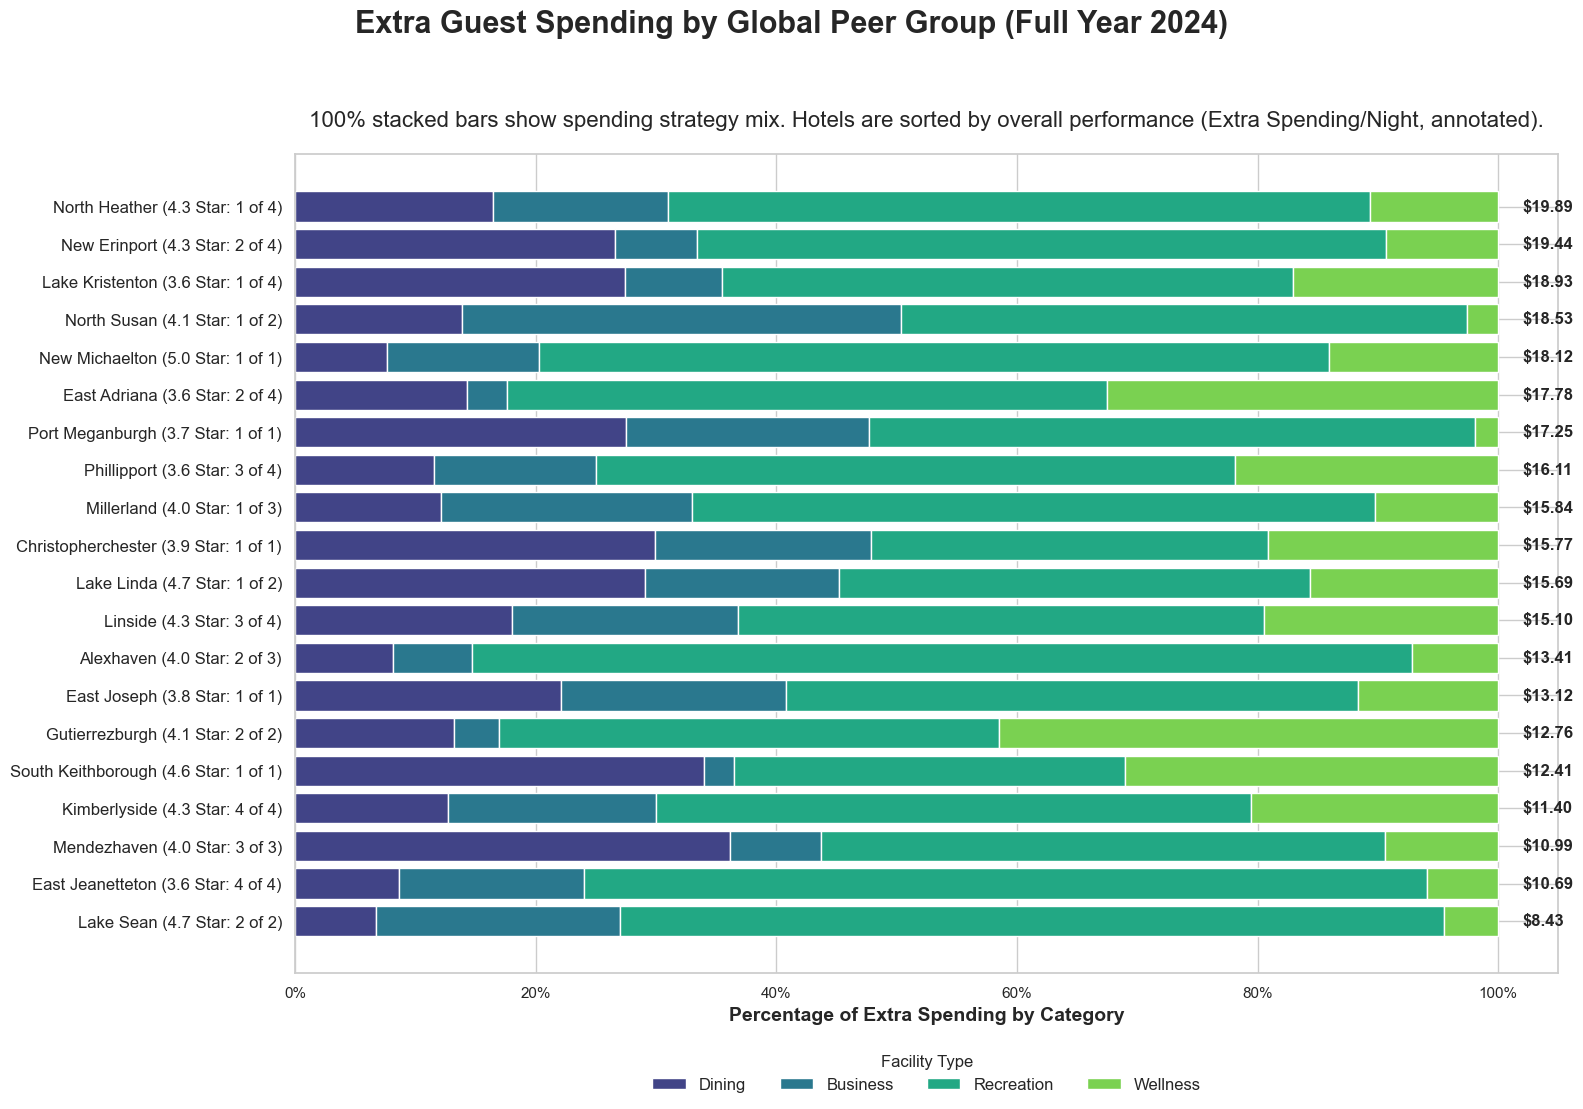

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Data Preparation (Using 2024 data for a full, fair comparison) ---
data = [
    ['5.0 Star: 1 of 1', 'New Michaelton', 'Dominican Republic', 18.12, 3804, 6360, 32885, 7029],
    ['4.7 Star: 1 of 2', 'Lake Linda', 'Mexico', 15.69, 13207, 7344, 17791, 7099],
    ['4.7 Star: 2 of 2', 'Lake Sean', 'Marshall Islands', 8.43, 1770, 5349, 18043, 1182],
    ['4.6 Star: 1 of 1', 'South Keithborough', 'Botswana', 12.41, 12753, 925, 12204, 11628],
    ['4.3 Star: 1 of 4', 'North Heather', 'Senegal', 19.89, 9695, 8554, 34300, 6271],
    ['4.3 Star: 2 of 4', 'New Erinport', 'American Samoa', 19.44, 14477, 3704, 31149, 5073],
    ['4.3 Star: 3 of 4', 'Linside', 'Rwanda', 15.10, 7796, 8135, 18927, 8425],
    ['4.3 Star: 4 of 4', 'Kimberlyside', 'Uganda', 11.40, 3942, 5371, 15365, 6385],
    ['4.1 Star: 1 of 2', 'North Susan', 'Saint Kitts and Nevis', 18.53, 6963, 18327, 23603, 1300],
    ['4.1 Star: 2 of 2', 'Gutierrezburgh', 'Gabon', 12.76, 5172, 1462, 16323, 16277],
    ['4.0 Star: 1 of 3', 'Millerland', 'Singapore', 15.84, 5665, 9729, 26547, 4774],
    ['4.0 Star: 2 of 3', 'Alexhaven', 'Kenya', 13.41, 3086, 2482, 29572, 2715],
    ['4.0 Star: 3 of 3', 'Mendezhaven', 'Cameroon', 10.99, 11466, 2402, 14862, 2969],
    ['3.9 Star: 1 of 1', 'Christopherchester', 'Brazil', 15.77, 14219, 8565, 15704, 9116],
    ['3.8 Star: 1 of 1', 'East Joseph', 'Equatorial Guinea', 13.12, 8092, 6877, 17409, 4275],
    ['3.7 Star: 1 of 1', 'Port Meganburgh', 'United Arab Emirates', 17.25, 14161, 10395, 25971, 991],
    ['3.6 Star: 1 of 4', 'Lake Kristenton', 'Mozambique', 18.93, 13952, 4070, 24152, 8660],
    ['3.6 Star: 2 of 4', 'East Adriana', 'Russian Federation', 17.78, 7350, 1715, 25648, 16747],
    ['3.6 Star: 3 of 4', 'Phillipport', 'Heard Island and McDonald Islands', 16.11, 6222, 7242, 28558, 11788],
    ['3.6 Star: 4 of 4', 'East Jeanetteton', 'Italy', 10.69, 2696, 4787, 21807, 1836]
]
columns = ['Global_Peer_Rank', 'City', 'Country', 'Extra_Spending_per_Night', 'Dining', 'Business', 'Recreation', 'Wellness']
df = pd.DataFrame(data, columns=columns)

# --- 2. Visualization ---
categories = ['Dining', 'Business', 'Recreation', 'Wellness']
df['Total_Extra_Spending'] = df[categories].sum(axis=1)
for category in categories:
    df[f'{category}_pct'] = df[category] / df['Total_Extra_Spending'] * 100

df_sorted = df.sort_values('Extra_Spending_per_Night', ascending=True)
df_sorted['Label'] = df_sorted['City'] + " (" + df_sorted['Global_Peer_Rank'] + ")"

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 12))
colors = sns.color_palette("viridis", n_colors=len(categories))

left = pd.Series(0, index=df_sorted.index)
for i, category in enumerate(categories):
    ax.barh(df_sorted['Label'], df_sorted[f'{category}_pct'], left=left, label=category, color=colors[i])
    left += df_sorted[f'{category}_pct']

# --- 3. Final Touches ---
for i, (value, label) in enumerate(zip(df_sorted['Extra_Spending_per_Night'], df_sorted['Label'])):
    ax.text(102, i, f'${value:.2f}', va='center', ha='left', fontsize=12, fontweight='bold')

ax.set_xlabel('Percentage of Extra Spending by Category', fontsize=14, fontweight='bold')
ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=12)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

fig.suptitle('Extra Guest Spending by Global Peer Group (Full Year 2024)', fontsize=22, fontweight='bold')
ax.set_title(
    '100% stacked bars show spending strategy mix. Hotels are sorted by overall performance (Extra Spending/Night, annotated).',
    fontsize=16, pad=20
)
ax.legend(title='Facility Type', loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=len(categories), fontsize=12, frameon=False)

fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()